In [14]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(repo_root)

from src.utils.file_handlers import process_directory_c
from src.utils.c_operation_helpers import run_simulation


In [15]:
EXPERIMENT_PATH = os.path.join(repo_root, 'exp', 'ex01')
os.chdir(EXPERIMENT_PATH)
process_directory_c(EXPERIMENT_PATH)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jackyeung99/senior_thesis/higher_order_ranking/exp/exp/ex01'

### Example

In [3]:

data_dir = os.path.join(repo_root, 'datasets', 'Synthetic_Data')

filein_idx = 'N-1000_M-1000_K-2_L-0_epoch-0_nodes.txt'
filein_data = 'N-1000_M-1000_K-2_L-0_epoch-0_edges.txt'

edge_path = os.path.join(data_dir, filein_idx)
node_path = os.path.join(data_dir, filein_data)

results = run_simulation(edge_path, node_path, .8, 1)
print(results)

    model  av_error       rho       tau    prior log-likelihood  \
0   HO_BT  0.243707  0.528524  0.355003  -1.4806      -0.625357   
1  HOL_BT  0.243707  0.528818  0.355175  -1.4806      -0.625357   
2     BIN  0.243707  0.528578  0.355019  -1.4806      -0.625357   
3    BINL  0.243707  0.528602  0.355019  -1.4806      -0.625357   

  leadership-log-likelihood iterations  
0                 -0.625357          9  
1                 -0.625357          9  
2                 -0.625357          9  
3                 -0.625357          9  


### Full Results

In [4]:
df = pd.read_csv(os.path.join(EXPERIMENT_PATH, 'results', 'log_likelihood_summary.csv'))
df.apply(pd.to_numeric, errors='ignore')


/tmp/ipykernel_82470/2248384130.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df.apply(pd.to_numeric, errors='ignore')


,HO_BT,HOL_BT,BIN,BINL,N,M,K,L,epoch
0,-0.509787,-0.509787,-0.509787,-0.509787,1000,4641,2,0,0
1,-7.712430,-8.787990,-7.760840,-9.281960,1000,2782,8,0,3
2,-2.499240,-2.705210,-2.512530,-2.748590,1000,1668,4,0,3
3,-11.204600,-12.746300,-11.276500,-13.668400,1000,2782,10,0,4
4,-7.825060,-9.021220,-7.897950,-9.473860,1000,1668,8,0,3
...,...,...,...,...,...,...,...,...,...
112,-0.542882,-0.542882,-0.542882,-0.542882,1000,2782,2,0,2
113,-4.595160,-5.023640,-4.613280,-5.250370,1000,4641,6,0,1
114,-4.628470,-5.334120,-4.666090,-5.578630,1000,2782,6,0,4
115,-7.477870,-8.393500,-7.520880,-8.868460,1000,4641,8,0,0


In [13]:
main = df.groupby(by=['N', 'M', 'K', 'L']).mean().reset_index().drop(columns=['epoch'])
print(main)

       N     M   K  L      HO_BT     HOL_BT        BIN       BINL
0   1000  1000   2  0  -0.613862  -0.613862  -0.613862  -0.613863
1   1000  1000   4  0  -2.576346  -2.813756  -2.620724  -2.870450
2   1000  1000   6  0  -5.082084  -5.835092  -5.185716  -6.063294
3   1000  1000   8  0  -8.006292  -9.396482  -8.150516  -9.866980
4   1000  1000  10  0 -11.354180 -13.566360 -11.550620 -14.447260
5   1000  1668   2  0  -0.605866  -0.605866  -0.605866  -0.605866
6   1000  1668   4  0  -2.475184  -2.713064  -2.507250  -2.781410
7   1000  1668   6  0  -4.875254  -5.580722  -4.937108  -5.820492
8   1000  1668   8  0  -7.855666  -9.116722  -7.965806  -9.718606
9   1000  1668  10  0 -11.093340 -13.001780 -11.198980 -13.841240
10  1000  2782   2  0  -0.565115  -0.565115  -0.565115  -0.565115
11  1000  2782   4  0  -2.304722  -2.536628  -2.321988  -2.588828
12  1000  2782   6  0  -4.664446  -5.321152  -4.701604  -5.527826
13  1000  2782   8  0  -7.594628  -8.732208  -7.639040  -9.264814
14  1000  

In [6]:
main['R'] = df['M'] / df['N']

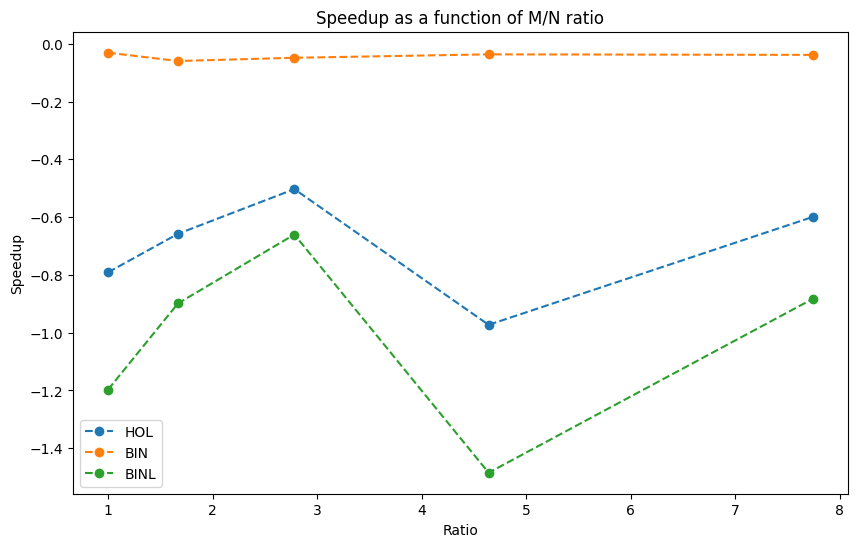

In [10]:
ho_df = main[(main['L'] == 0.0)]
grouped = main.groupby(by=['R']).mean().reset_index()
plt.figure(figsize=(10,6))
plt.title('Speedup as a function of M/N ratio')
# plt.plot(grouped['R'], grouped['HO_BT'], marker='o', linestyle = '--', label='HO')
plt.plot(grouped['R'], grouped['HOL_BT'] - grouped['HO_BT'], marker='o', linestyle = '--', label='HOL')
plt.plot(grouped['R'], grouped['BIN'] - grouped['HO_BT'], marker='o', linestyle = '--', label='BIN')
plt.plot(grouped['R'], grouped['BINL'] - grouped['HO_BT'], marker='o', linestyle = '--', label='BINL')
# plt.xscale('log')
plt.xlabel('Ratio')
plt.ylabel('Speedup')
plt.legend()

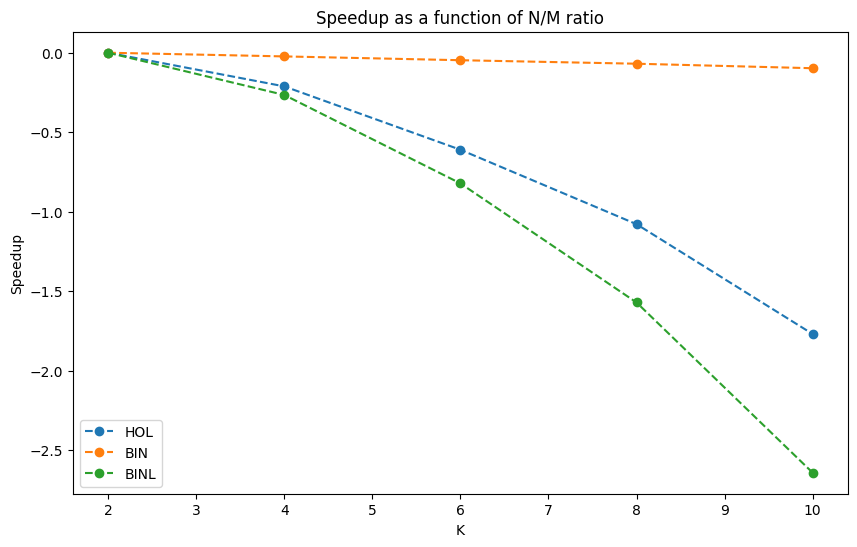

In [11]:
ho_df = main[(main['L'] == 0.0)]
grouped = main.groupby(by=['K']).mean().reset_index()
grouped
plt.figure(figsize=(10,6))
plt.title('Speedup as a function of N/M ratio')
# plt.plot(grouped['K'], grouped['HO_BT'], marker='o', linestyle = '--', label='HO')
plt.plot(grouped['K'], grouped['HOL_BT'] -grouped['HO_BT'], marker='o', linestyle = '--', label='HOL')
plt.plot(grouped['K'], grouped['BIN'] - grouped['HO_BT'], marker='o', linestyle = '--', label='BIN')
plt.plot(grouped['K'], grouped['BINL'] - grouped['HO_BT'], marker='o', linestyle = '--', label='BINL')
plt.xlabel('K')
plt.ylabel('Speedup')
plt.legend()